In [9]:
# Imports and set torch device
import numpy as np
import meshplot as mp
import torch
import sys
from scripts.helper_functions import segment
import kaolin as kal
import matplotlib.pyplot as plt
from meshseg.models.GLIP.glip import GLIPModel
import igl

if torch.cuda.is_available():
    device = torch.device("cuda:0")
    torch.cuda.set_device(device)
else:
    device = torch.device("cpu")

print('Torch will run on:', device)

object = 'coathanger' 
obj_path = 'data/demo/' + object + '.obj'

Torch will run on: cuda:0


In [10]:
# Read mesh
mesh = kal.io.obj.import_mesh(
    obj_path,
    with_normals=True,
    with_materials=False,
)

vertices_tensor = mesh.vertices.to(device)
faces_tensor = mesh.faces.to(device)

vertices = vertices_tensor.detach().cpu().numpy()
faces = faces_tensor.detach().cpu().numpy()

print('Number of vertices: ', vertices.shape[0])
print('Number of faces: ', faces.shape[0])

Number of vertices:  10990
Number of faces:  14380


In [11]:
# Visualize mesh
mp.plot(vertices, faces)
plt.show()

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, 0.02…

data/demo\coathanger.obj
['the hooks of a coathanger.', 'the installation of a coathanger.']
{'hooks': 0, 'installation': 1, 'unknown': 2}
Reading the mesh...
Reading the mesh with path: data/demo\coathanger.obj
	having 14380 faces and 10990 vertices
Creating the renderer...
Background: tensor([255., 255., 255.], device='cuda:0')
Rendering the views...
Rendering the views...done
VISION BACKBONE USE GRADIENT CHECKPOINTING:  False
LANGUAGE BACKBONE USE GRADIENT CHECKPOINTING:  False
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
Getting faces neighborhood
Computing vertices pairwise distances
Feeding the views to GLIP...
View number: 0 Prompt: 0 inference time per image: 0.9054589999999791
View number: 0 Prompt: 1 inference time per image: 0.5151401999999905
View number: 1 Prompt: 0 inference time per imag

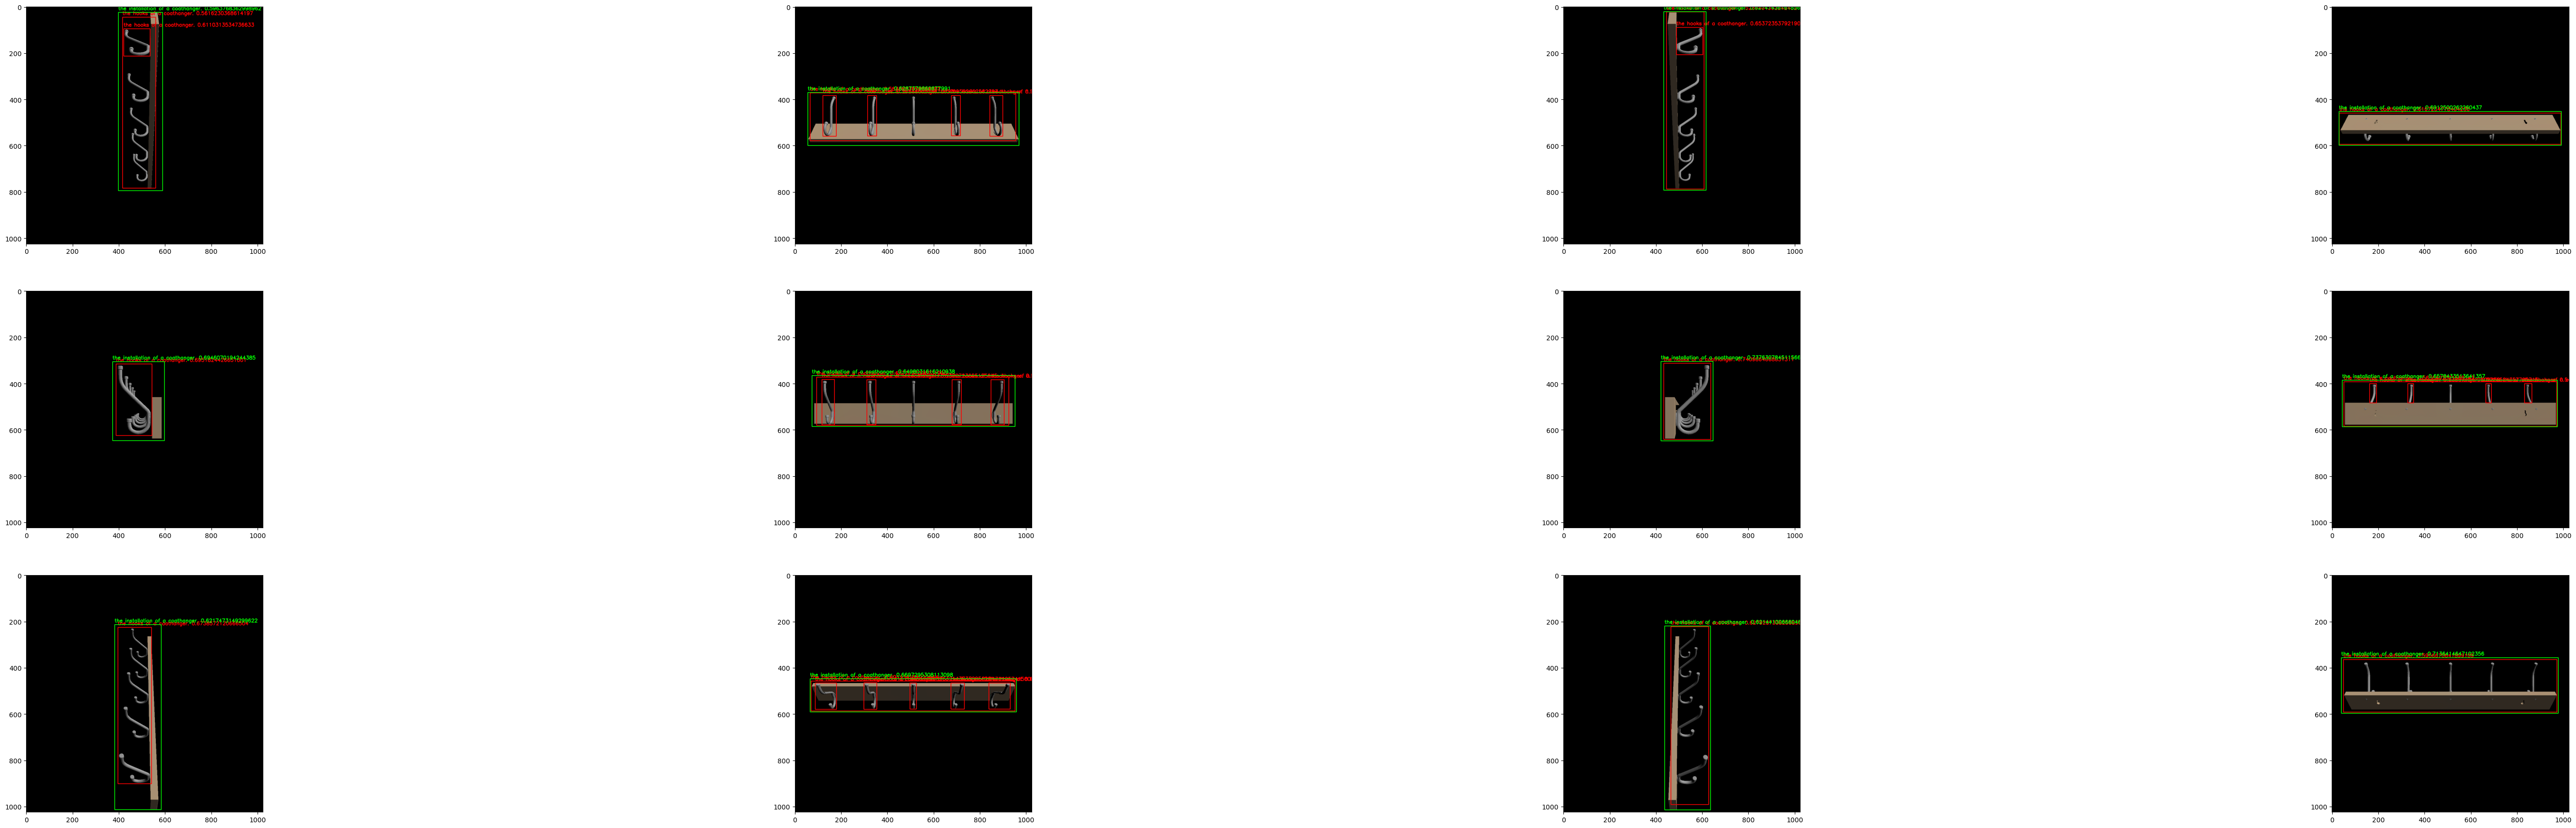

Finished GLIP


0it [00:00, ?it/s]

Processing view: 0, Prompt: 0
Processing view: 0, Prompt: 1
Processing view: 1, Prompt: 0
Processing view: 1, Prompt: 1
Processing view: 2, Prompt: 0
Processing view: 2, Prompt: 1
Processing view: 3, Prompt: 0
Processing view: 3, Prompt: 1
Processing view: 4, Prompt: 0
Processing view: 4, Prompt: 1
Processing view: 5, Prompt: 0
Processing view: 5, Prompt: 1
Processing view: 6, Prompt: 0
Processing view: 6, Prompt: 1
Processing view: 7, Prompt: 0
Processing view: 7, Prompt: 1
Processing view: 8, Prompt: 0
Processing view: 8, Prompt: 1
Processing view: 9, Prompt: 0
Processing view: 9, Prompt: 1
Processing view: 10, Prompt: 0
Processing view: 10, Prompt: 1
Processing view: 11, Prompt: 0
Processing view: 11, Prompt: 1


In [12]:
if (object[-1].isdigit()):
    config_path = 'configs/demo/' + object[:-2] + '.yaml'
else:
    config_path = 'configs/demo/' + object + '.yaml'

segment(
    config_path,
    object + '.obj',
    'outputs/demo/ABO/' + object + '/'
    )

In [13]:
import json
colors_dict = {
    0: [1, 0, 0],   # Red
    1: [0, 1, 0],   # Green
    2: [0, 0, 1],   # Blue
    3: [1, 1, 0],   # Yellow
    4: [1, 0, 1],   # Magenta
    5: [0, 1, 1],   # Cyan
    6: [0.5, 0, 0], # Dark Red
    7: [0, 0.5, 0], # Dark Green
    8: [0, 0, 0.5], # Dark Blue
    9: [0.5, 0.5, 0.5] # Gray
}
colors_lst = ['Red', 'Green', 'Blue', 'Yellow', 'Magenta', 'Cyan', 'Dark Red', 'Dark Green', 'Dark Blue', 'Grey']
output_file = open('./outputs/demo/ABO/' + object + '/face_preds.json')
output = np.array(json.load(output_file))
segments = np.unique(output)
segments_idx = np.unique(output, return_inverse=True)[1]
prompts = segments.tolist()
if ('unknown' in prompts):
    prompts.remove('unknown')
# print('Prompts: ', prompts)
colors = np.array([colors_dict[segment_id] for segment_id in segments_idx])
for i in range(len(segments)):
    print(colors_lst[i],':\t',segments[i])
mp.plot(vertices, faces, colors, return_plot=True)
plt.show()

Red :	 hooks
Green :	 installation
Blue :	 unknown


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.0, 0.02…